In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker
import seaborn as sns

df = pd.read_csv('D:\data analyst\Large Language Model\llm_comparison_dataset.csv')

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aungh\AppData\Local\Temp\ipykernel_40092\1469643195.py:7: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('D:\data analyst\Large Language Model\llm_comparison_dataset.csv')


Exploratory Data Analysis

In [4]:
df.head()

,Model,Provider,Context Window,Speed (tokens/sec),Latency (sec),Benchmark (MMLU),Benchmark (Chatbot Arena),Open-Source,Price / Million Tokens,Training Dataset Size,Compute Power,Energy Efficiency,Quality Rating,Speed Rating,Price Rating
0,DeepSeek-4,Deepseek,128000,95,2.74,85,1143,1,18.81,760952565,13,0.50,2,2,3
1,Llama-8,Meta AI,300000,284,3.21,71,1390,1,3.98,22891342,22,2.07,1,3,3
2,Llama-5,Meta AI,300000,225,2.95,85,1406,0,1.02,827422145,21,0.95,2,3,2
3,DeepSeek-3,Deepseek,2000000,242,12.89,72,1264,1,27.63,694305632,86,3.51,1,3,3
4,DeepSeek-8,Deepseek,1000000,71,3.80,77,1381,1,18.52,378552278,92,1.80,2,2,3


Change 1 and 0 into True and False(df['Open-Source'])

In [10]:
df['Open-Source'] = df['Open-Source'].astype(bool)
df['Open-Source']

0       True
1       True
2      False
3       True
4       True
       ...  
195    False
196     True
197     True
198     True
199    False
Name: Open-Source, Length: 200, dtype: bool

#What are the major provider in the market?

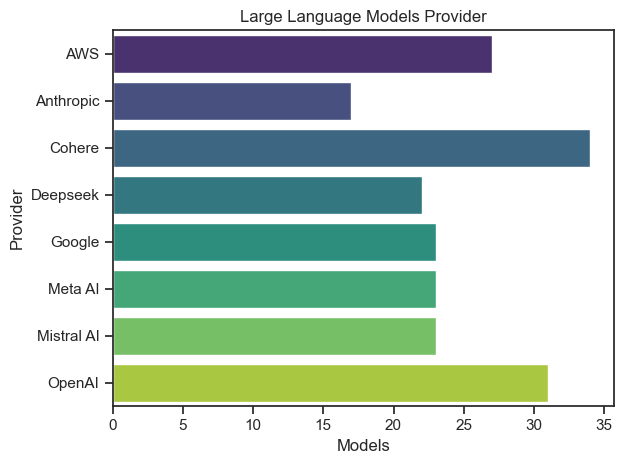

In [38]:
df_provider = df.groupby('Provider').size().reset_index(name='Models')
sns.set_theme(style='ticks')
sns.barplot(data=df_provider, x='Models', y='Provider',palette='viridis',legend=False,hue='Provider')


plt.title('Large Language Models Provider')
plt.tight_layout()
plt.show()


Top 3 Provider in Markets

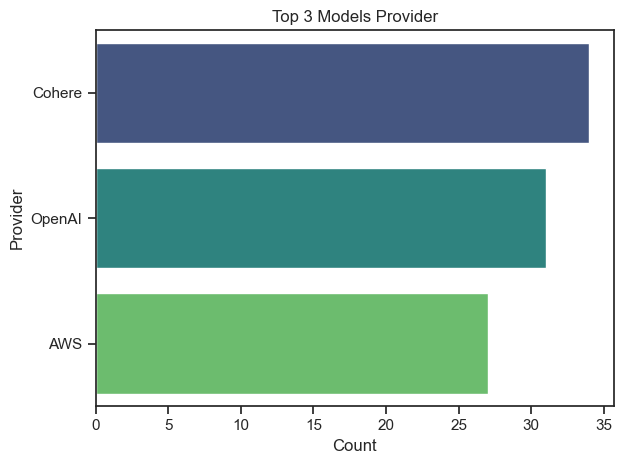

In [64]:
top3_provider = df['Provider'].value_counts().head(3).reset_index()
top3_provider.columns = ['Provider','Count']

# Set theme
sns.set_theme(style='ticks')

# Corrected barplot with explicit x and y
sns.barplot(data=top3_provider, x='Count', y='Provider', hue='Provider', palette='viridis', legend=False)

# Title and layout
plt.title('Top 3 Models Provider')
plt.tight_layout()
plt.show()

How many Open source in the market?

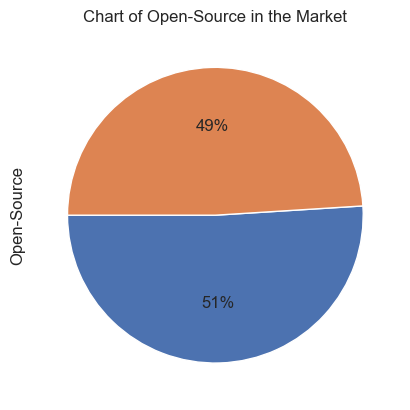

In [86]:
open_source = df['Open-Source'].value_counts()

sns.set_theme(style='darkgrid')
open_source.plot(kind='pie', startangle=180, autopct='%1.0f%%', labels=[''] * len(open_source))
plt.title('Chart of Open-Source in the Market')
plt.ylabel("Open-Source")
plt.show()